In [7]:
library(knitr)
library(dplyr)
library(survival)
library(ggplot2)
library(tibble)
library(lubridate)
library("gtsummary")
library(ggsurvfit)
library(tidycmprsk)
#library('ggforest')
library("svglite")
library(survminer)

In [2]:
live = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/FragSurvivalData.csv", 
                header = T

                
) %>%
filter(Site!="GR")  %>%
rename("Reef"= "Site")%>%
filter(Genotype %in% c("CN2", "CN4", "ML2", "HS1"))
head(live, n=2)
tail(live, n=2)
dim(live)

,Survey.,Reef,Genotype,MedDate,Sampled.Cluster,FragSampled,Tag.,Frag.,LiveFrag,DeadFrag,ColType,Adjusted.Area,X.TimesSampled,ClusterDepth,Day.
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>
1,1,CF,CN2,6/21/18,Yes,n,3,1A,1,0,L,23.6635,NA,18.4,0
2,1,CF,CN2,6/21/18,Yes,n,3,2B,1,0,L,36.2543,NA,18.4,0


,Survey.,Reef,Genotype,MedDate,Sampled.Cluster,FragSampled,Tag.,Frag.,LiveFrag,DeadFrag,ColType,Adjusted.Area,X.TimesSampled,ClusterDepth,Day.
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>
4719,10,PR,HS1,12/5/19,No,n,129,5,1,0,L,48.9985,NA,16.09,532
4720,10,PR,HS1,12/5/19,No,n,129,6,0,0,PD,0.0000,NA,16.09,532


[1] 4720   15

In [3]:
res.cox <- coxph(Surv(Day., LiveFrag) ~ Genotype*Reef, data =  live)
res.cox 

Call:
coxph(formula = Surv(Day., LiveFrag) ~ Genotype * Reef, data = live)

                        coef exp(coef) se(coef)      z        p
GenotypeCN4         -1.15901   0.31380  0.11635 -9.961  < 2e-16
GenotypeHS1         -0.24572   0.78214  0.08897 -2.762  0.00575
GenotypeML2         -0.73623   0.47891  0.12828 -5.739 9.51e-09
ReefNDR              0.40370   1.49735  0.07917  5.099 3.42e-07
ReefPR               0.43596   1.54645  0.07759  5.619 1.92e-08
GenotypeCN4:ReefNDR  1.04900   2.85479  0.13714  7.649 2.02e-14
GenotypeHS1:ReefNDR  0.14457   1.15554  0.11097  1.303  0.19263
GenotypeML2:ReefNDR  0.66186   1.93840  0.15577  4.249 2.15e-05
GenotypeCN4:ReefPR   1.14815   3.15235  0.13533  8.484  < 2e-16
GenotypeHS1:ReefPR   0.12776   1.13628  0.11005  1.161  0.24568
GenotypeML2:ReefPR   0.64935   1.91429  0.15444  4.204 2.62e-05

Likelihood ratio test=535.4  on 11 df, p=< 2.2e-16
n= 4720, number of events= 3792 

In [4]:
out = tidy(res.cox)
head(out)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GenotypeCN4,-1.1590082,0.11635011,-9.961385,2.249077e-23
GenotypeHS1,-0.2457178,0.08897002,-2.761804,5.748290e-03
GenotypeML2,-0.7362338,0.12828214,-5.739177,9.513799e-09
ReefNDR,0.4036991,0.07917382,5.098896,3.416396e-07
ReefPR,0.4359632,0.07758736,5.618998,1.920683e-08
GenotypeCN4:ReefNDR,1.0489989,0.13714063,7.649074,2.024310e-14


In [5]:
#write.csv(out,"/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/table_cox.csv")

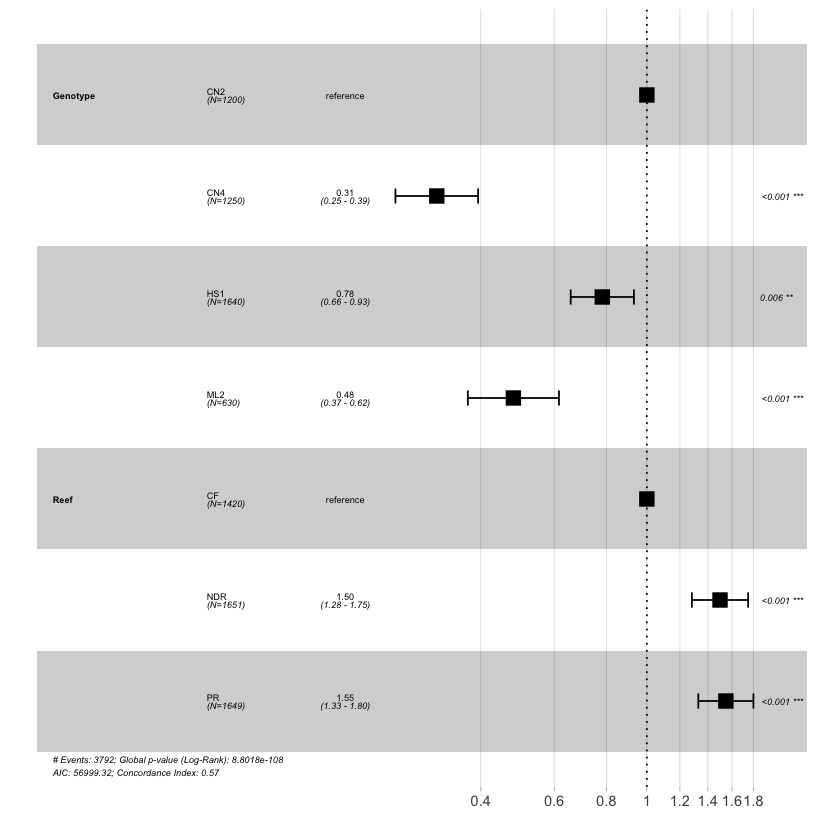

In [6]:
ggforest(res.cox, data = live,
        fontsize=0.5, main=NULL)
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig2.svg", width=4, height=4,dpi = 300)
